In [2]:
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit_aer import Aer
from qiskit_ibm_runtime import QiskitRuntimeService
# ibm 양자 시스템 접속
service = QiskitRuntimeService(
    channel='ibm_quantum',
    token='' # API token
)

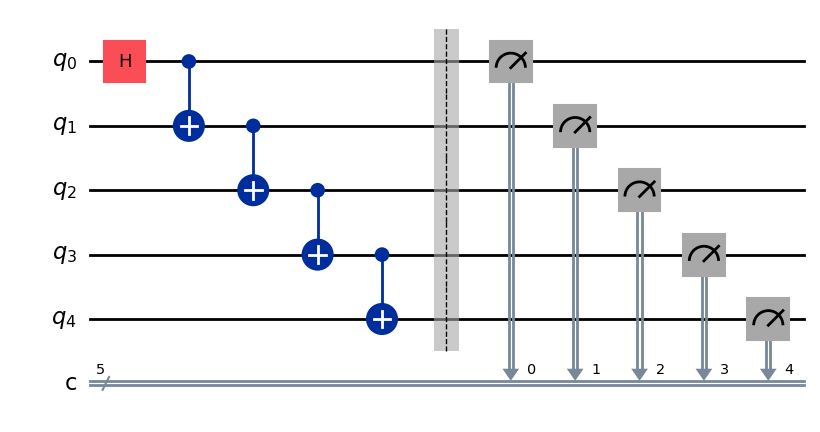

In [3]:
circ = QuantumCircuit(5, 5)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.cx(2, 3)
circ.cx(3, 4)
circ.barrier()
circ.measure(range(5), range(5))
circ.draw('mpl')


{'11111': 493, '00000': 531}


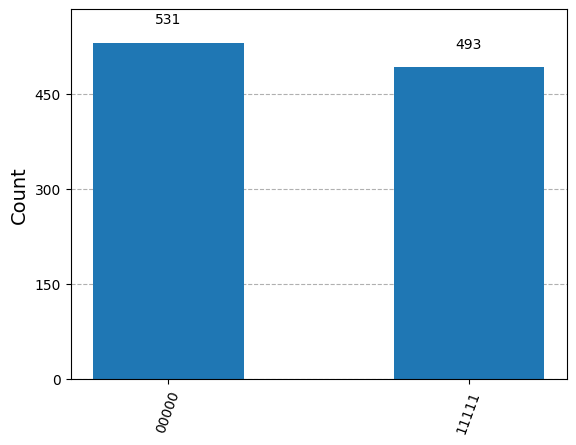

In [4]:

backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(circ, backend), shots=1024)
result = job.result()
counts = result.get_counts(circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)